###### Регрессия

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

В регрессии мы предсказываем значение функции на основе значения аргумента.ную переменную. Это легче всего сделать для одного измерения. Начнем с очень простого примера. Мы создадим набор данных на основе функции sin(x) с некоторым шумом:

Задаем диапазон изменений и шаг для х.

In [2]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

Определяем у = sin(4 * x) + x с некоторымы случайными отклонениями от вычисленных значений у

In [3]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

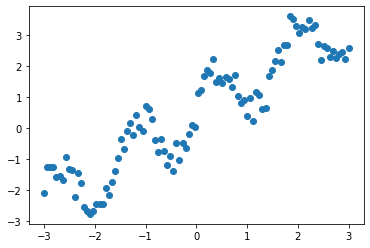

In [4]:
plt.plot(x, y, 'o')

Линейная модель регрессии самая простая. С ее помощью можно предсказать значения, лежащие на линии. Чтобы применить модель scikit-learn, нам нужно сделать X двумерным массивом:

In [5]:
print(x.shape)
X = x[:, np.newaxis]
print(X.shape)

(100,)
(100, 1)


Делим наши данные на обучающий (тренировочный) и тестовый наборы

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Сначала обучаемся на тренировочном наборе

In [8]:
y_pred_train = regressor.predict(X_train)

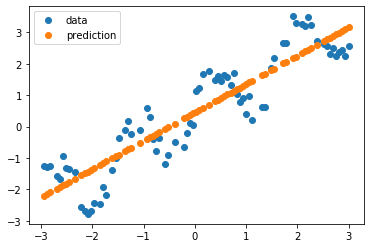

In [9]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

Линия показывает общий ход, но детали конечно не описывает

In [10]:
y_pred_test = regressor.predict(X_test)

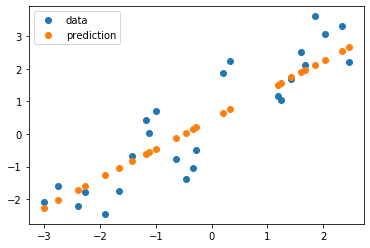

In [11]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

Оценим качество предсказаний

In [12]:
regressor.score(X_test, y_test)

0.7994321405079685

###### Метод К-ближайших соседей в регрессии. Усредняются несколько (К) ближайших точек 

In [13]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

Делим выборку на две - тренировочную и тестовую

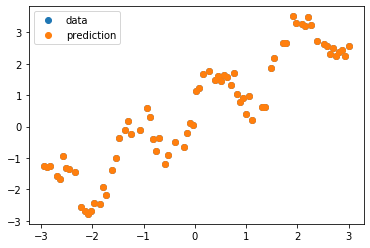

In [14]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

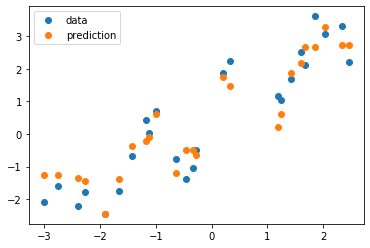

In [15]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

In [16]:
kneighbor_regression.score(X_test, y_test)

0.9166293022467948